### Intro
El Análisis de Componentes Principales (PCA, por sus siglas en inglés Principal Component Analysis) es una técnica estadística clásica cuyo objetivo es reducir la dimensionalidad de un conjunto de datos, preservando la mayor cantidad posible de la varianza original.

Ejemplo gráfico

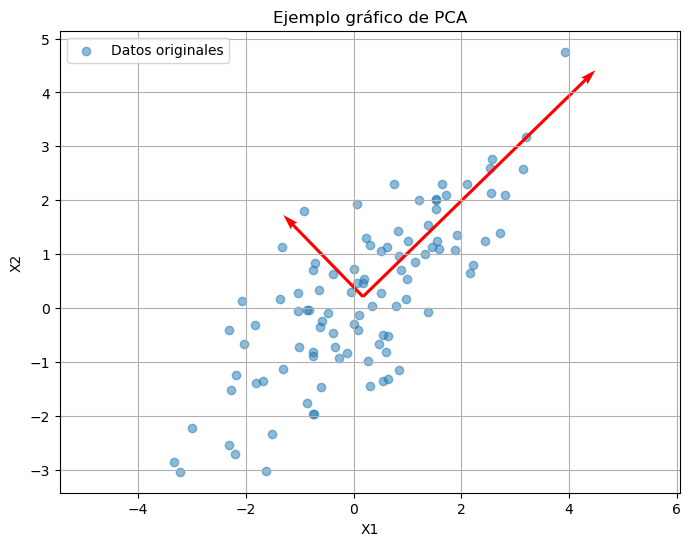

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Creamos un conjunto de datos sintético
np.random.seed(42)
n_samples = 100
X = np.random.multivariate_normal([0, 0], [[3, 2.5], [2.5, 3]], n_samples)

# Aplicamos PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
components = pca.components_
mean = pca.mean_

# Graficamos los datos originales y los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Datos originales')

# Dibujar los componentes principales
for length, vector in zip(pca.explained_variance_, components):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(*mean, *v, angles='xy', scale_units='xy', scale=1, color='r', width=0.005)

plt.title('Ejemplo gráfico de PCA')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()



Aquí el objetivo sería reducir este conjunto de datos que está en 2 dimensiones (son dos variable) a 1 dimensión

# ¿Cómo se hace esto?

## Objetivo
Dado un conjunto de datos $\{ x_n \}_{n=1}^N$ de dimensión $D$,  
el objetivo es **mapearlos a una dimensión** $M$ tal que $M < D$ (es decir, reducir la dimensionalidad).

---

## Proyección sobre un componente

La proyección de un vector $x_i$ sobre el componente principal $u_1$ se expresa como:

$$
\text{Proy}_{u_1}(x_i) = u_1^T x_i
$$

La media de las proyecciones es:

$$
u_1^T \bar{x}
$$

donde $\bar{x}$ es la media de los datos.

---

## Varianza de las proyecciones

La varianza de los datos proyectados sobre $u_1$ es:

$$
\text{Varianza} = \frac{1}{N} \sum_{n=1}^N \left( u_1^T x_n - u_1^T \bar{x} \right)^2
$$

Esto se puede reorganizar como:

$$
= \frac{1}{N} \sum_{n=1}^N \left( u_1^T (x_n - \bar{x}) \right)^2
$$

Aplicando propiedades de la transpuesta:

$$
= \frac{1}{N} \sum_{n=1}^N u_1^T (x_n - \bar{x})(x_n - \bar{x})^T u_1
$$

Finalmente, agrupando términos:

$$
= u_1^T S u_1
$$

donde:

- $S$ es la matriz de covarianza de los datos.

---

## Interpretación gráfica

- El diagrama muestra los datos originales dispersos en dos dimensiones.
- $u_1$ indica la **dirección del primer componente principal**, es decir, la dirección donde los datos **se extienden más**.
- La idea es **proyectar** los datos sobre $u_1$ para **capturar la máxima varianza** en una sola dimensión.

---


# Optimización para encontrar el primer componente principal

Queremos encontrar el vector $u_1$ que **maximice** la varianza de las proyecciones, es decir:

$$
\max_{u_1} u_1^T S u_1
$$

sujeto a la restricción:

$$
\|u_1\| = 1
$$

donde:

- $S$ es la **matriz de covarianza** de los datos.
- $\|u_1\| = 1$ asegura que $u_1$ sea un **vector unitario** (norma 1).

---

## Resolución con multiplicadores de Lagrange

Planteamos la función Lagrangiana:

$$
\mathcal{L}(u_1, \lambda) = u_1^T S u_1 - \lambda (u_1^T u_1 - 1)
$$

donde $\lambda$ es el multiplicador de Lagrange.

Derivamos respecto a $u_1$ y igualamos a cero:

$$
\frac{\partial \mathcal{L}}{\partial u_1} = 2 S u_1 - 2 \lambda u_1 = 0
$$

lo que se puede reorganizar como:

$$
S u_1 = \lambda u_1
$$

---

## Interpretación

Esto es precisamente la **definición de un problema de autovalores (eigenvalores)**:

- $u_1$ es un **vector propio** (*eigenvector*) de la matriz de covarianza $S$.
- $\lambda$ es el **valor propio** (*eigenvalue*) asociado.

El **primer componente principal** $u_1$ es el **eigenvector correspondiente al eigenvalor más grande** de $S$.

La segunda componente principal será aquella que resuelva con el segundo eigenvalor más grande y así sucesivamente



---

## Resumen

- El **PCA busca la dirección** (el eigenvector) donde la varianza de los datos proyectados es máxima.
- Esa dirección corresponde al **mayor eigenvalor** de la matriz de covarianza de los datos.

---
